# Introduction

Authors:

- [Arthur Estefanato Lopes](a.e@.edu.ufes.br)
- [Jheam Storch Ross](jheam.ross@edu.ufes.br)

work about bla-bla-bla

Every heading1 (#) markdown session in this notebook is independent from the others, so you can run them in any order you want as long as the previous archifacts are available.

# Setup

## Download the database

Get all the three datasets from:

- https://ieee-dataport.org/open-access/imdb-users-ratings-dataset
    - notas dos usuário para filmes (até 2020)
    - idealmente, deveríamos ter uma fonte de no mínimo 2023
- https://www.kaggle.com/datasets/freeth/letterboxd-film-ratings
    - notas dos usuários para filmes (até 2023)
- https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews
    - notas dos usuários para filmes (até 2023)

Unzip them to the `data` folder, `raw` subfolder.

Each with the following subsubfolder name:

- imdb_user_ratings_ieee
- letterboxd_user_ratings_kaggle
- rt_user_ratings_kaggle

# Preprocessing

## Install the dependencies

In [ ]:
%pip install \
    numpy \
    pandas

Note: you may need to restart the kernel to use updated packages.


## Import the dataset

In [5]:
data_dir = 'data'
data_raw_dir = data_dir + '/raw'

imdb_dir = "imdb_user_ratings_ieee"
letterboxd_dir = "letterboxd_user_ratings_kaggle"
rt_dir = "rt_user_ratings_kaggle"

In [3]:
import numpy as np
import pandas as pd

### IMDb

In [30]:
np_imdb = np.load(data_raw_dir + '/' + imdb_dir + '/Dataset.npy')

df_imdb = pd.DataFrame(np_imdb)[0].str.split(',', expand=True)
df_imdb.columns = ['user_id', 'movie_id', 'rating', 'timestamp']

In [31]:
df_imdb['user_id'] = df_imdb['user_id'].astype(str)
df_imdb['movie_id'] = df_imdb['movie_id'].astype(str)
df_imdb['rating'] = pd.to_numeric(df_imdb['rating'], errors='coerce')
df_imdb['timestamp'] = pd.to_datetime(df_imdb['timestamp'], format='%d %B %Y', errors='coerce')

In [33]:
df_imdb.info()
df_imdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669820 entries, 0 to 4669819
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   user_id    object        
 1   movie_id   object        
 2   rating     int64         
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 142.5+ MB


,user_id,movie_id,rating,timestamp
0,ur4592644,tt0120884,10,2005-01-16
1,ur3174947,tt0118688,3,2005-01-16
2,ur3780035,tt0387887,8,2005-01-16
3,ur4592628,tt0346491,1,2005-01-16
4,ur3174947,tt0094721,8,2005-01-16


In [34]:
df_imdb.isnull().sum()

# Como não há valores nulos, não removemos nenhuma linha

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

### Letterboxd

In [71]:
df_letterboxd_films = pd.read_csv(
    data_raw_dir + '/' + letterboxd_dir + '/films.csv',
    on_bad_lines='warn')
df_letterboxd_films.info()
df_letterboxd_films.head()

/tmp/ipykernel_8171/301504211.py:1: ParserWarning: Skipping line 6362: expected 4 fields, saw 6
Skipping line 39607: expected 4 fields, saw 5
Skipping line 79557: expected 4 fields, saw 5
Skipping line 79706: expected 4 fields, saw 5
Skipping line 105695: expected 4 fields, saw 5

  df_letterboxd_films = pd.read_csv(
/tmp/ipykernel_8171/301504211.py:1: ParserWarning: Skipping line 135402: expected 4 fields, saw 5
Skipping line 155614: expected 4 fields, saw 6
Skipping line 254568: expected 4 fields, saw 5

  df_letterboxd_films = pd.read_csv(
/tmp/ipykernel_8171/301504211.py:1: ParserWarning: Skipping line 280112: expected 4 fields, saw 5
Skipping line 302786: expected 4 fields, saw 5
Skipping line 311062: expected 4 fields, saw 5
Skipping line 318176: expected 4 fields, saw 7
Skipping line 350994: expected 4 fields, saw 5
Skipping line 354958: expected 4 fields, saw 5

  df_letterboxd_films = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355114 entries, 0 to 355113
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   film_id     355113 non-null  object 
 1   film_name   355113 non-null  object 
 2   year        349108 non-null  float64
 3   poster_url  355114 non-null  object 
dtypes: float64(1), object(3)
memory usage: 10.8+ MB


,film_id,film_name,year,poster_url
0,anthem-of-a-teenage-prophet,Anthem of a Teenage Prophet,2018.0,https://a.ltrbxd.com/resized/film-poster/3/8/6...
1,elf-buddys-musical-christmas,Elf: Buddy's Musical Christmas,2014.0,https://a.ltrbxd.com/resized/film-poster/2/3/8...
2,look-at-us-now-mother,"Look at Us Now, Mother!",2016.0,https://a.ltrbxd.com/resized/film-poster/3/2/6...
3,fate-grand-order-absolute-demonic-front-babylonia,Fate/Grand Order Absolute Demonic Front: Babyl...,2019.0,https://a.ltrbxd.com/resized/film-poster/6/7/1...
4,memory-2022,Memory,2022.0,https://a.ltrbxd.com/resized/film-poster/7/3/4...


In [38]:
df_letterboxd_ratings = pd.read_csv(data_raw_dir + '/' + letterboxd_dir + '/ratings.csv')
df_letterboxd_ratings.info()
df_letterboxd_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175545 entries, 0 to 18175544
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_name  object 
 1   film_id    object 
 2   rating     float64
dtypes: float64(1), object(2)
memory usage: 416.0+ MB


,user_name,film_id,rating
0,kurstboy,spider-man-2,4.5
1,kurstboy,tetsuo-the-iron-man,4.0
2,kurstboy,bram-stokers-dracula,4.5
3,kurstboy,poison-2023,4.5
4,kurstboy,the-rat-catcher-2023,3.5


In [72]:
df_letterboxd_films.isnull().sum()

film_id          1
film_name        1
year          6006
poster_url       0
dtype: int64

In [75]:
df_letterboxd_films.dropna(subset=['film_id', 'film_name'], inplace=True)
df_letterboxd_films.isnull().sum()

film_id          0
film_name        0
year          6006
poster_url       0
dtype: int64

In [60]:
df_letterboxd_ratings.isnull().sum()

user_name    0
film_id      8
rating       0
dtype: int64

In [76]:
df_letterboxd_ratings = df_letterboxd_ratings.dropna(subset=['film_id', 'rating'])
df_letterboxd_ratings.isnull().sum()

user_name    0
film_id      0
rating       0
dtype: int64

In [84]:
df_letterboxd = pd.merge(
    df_letterboxd_ratings,
    df_letterboxd_films,
    how='inner',
    left_on='film_id',
    right_on='film_id')

df_letterboxd.info()
df_letterboxd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175268 entries, 0 to 18175267
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   user_name   object 
 1   film_id     object 
 2   rating      float64
 3   film_name   object 
 4   year        float64
 5   poster_url  object 
dtypes: float64(2), object(4)
memory usage: 832.0+ MB


,user_name,film_id,rating,film_name,year,poster_url
0,kurstboy,spider-man-2,4.5,Spider-Man 2,2004.0,https://a.ltrbxd.com/resized/sm/upload/pq/mi/k...
1,kurstboy,tetsuo-the-iron-man,4.0,Tetsuo: The Iron Man,1989.0,https://a.ltrbxd.com/resized/sm/upload/nk/ig/t...
2,kurstboy,bram-stokers-dracula,4.5,Bram Stoker's Dracula,1992.0,https://a.ltrbxd.com/resized/film-poster/4/8/4...
3,kurstboy,poison-2023,4.5,Poison,2023.0,https://a.ltrbxd.com/resized/film-poster/1/0/5...
4,kurstboy,the-rat-catcher-2023,3.5,The Rat Catcher,2023.0,https://a.ltrbxd.com/resized/film-poster/1/0/5...


### Rotten Tomatoes

In [87]:
df_rt_movies = pd.read_csv(
    data_raw_dir + '/' + rt_dir + '/rotten_tomatoes_movies.csv')
df_rt_movies.info()
df_rt_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139041 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23001 non-null   object 
 15  

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [88]:
df_rt_movies.isnull().sum()

id                           0
title                      367
audienceScore            70010
tomatoMeter             109381
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                  4217
writer                   53142
boxOffice               128515
distributor             120257
soundMix                127341
dtype: int64

In [89]:
df_rt_movies.dropna(subset=['id', 'title'], inplace=True)
df_rt_movies.isnull().sum()

id                           0
title                        0
audienceScore            69643
tomatoMeter             109014
rating                  128905
ratingContents          128905
releaseDateTheaters     112129
releaseDateStreaming     63511
runtimeMinutes           13522
genre                    10783
originalLanguage         13558
director                  3924
writer                   52817
boxOffice               128150
distributor             119897
soundMix                126978
dtype: int64

In [90]:
df_rt_reviews = pd.read_csv(
    data_raw_dir + '/' + rt_dir + '/rotten_tomatoes_movie_reviews.csv')
df_rt_reviews.info()
df_rt_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444963 entries, 0 to 1444962
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1444963 non-null  object
 1   reviewId        1444963 non-null  int64 
 2   creationDate    1444963 non-null  object
 3   criticName      1444963 non-null  object
 4   isTopCritic     1444963 non-null  bool  
 5   originalScore   1009745 non-null  object
 6   reviewState     1444963 non-null  object
 7   publicatioName  1444963 non-null  object
 8   reviewText      1375738 non-null  object
 9   scoreSentiment  1444963 non-null  object
 10  reviewUrl       1234038 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 111.6+ MB


,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [91]:
df_rt_reviews.isnull().sum()

id                     0
reviewId               0
creationDate           0
criticName             0
isTopCritic            0
originalScore     435218
reviewState            0
publicatioName         0
reviewText         69225
scoreSentiment         0
reviewUrl         210925
dtype: int64

In [92]:
df_rt_reviews.dropna(subset=['originalScore'], inplace=True)
df_rt_reviews.isnull().sum()

id                     0
reviewId               0
creationDate           0
criticName             0
isTopCritic            0
originalScore          0
reviewState            0
publicatioName         0
reviewText         69054
scoreSentiment         0
reviewUrl         163277
dtype: int64

In [93]:
# delete every df_rt_reviews['originalScore'] that is not a 'A/B' format

df_rt_reviews = df_rt_reviews[df_rt_reviews['originalScore'].str.contains('/')]
df_rt_reviews = df_rt_reviews[~df_rt_reviews['originalScore'].str.contains('\*')]
df_rt_reviews = df_rt_reviews[~df_rt_reviews['originalScore'].str.contains('[a-zA-Z]')]

In [94]:
# originalScore is in format 'X/Y', so we need to split it and calc X/Y
# - remove the quote character

df_rt_reviews['originalScore'] = df_rt_reviews['originalScore'].str.replace(' ', '')
df_rt_reviews['originalScore'] = df_rt_reviews['originalScore'].str.replace("'", '')

df_rt_reviews['originalScore_rating'] = pd.to_numeric(df_rt_reviews['originalScore'].str.split('/', expand=True)[0], errors='coerce')
df_rt_reviews['originalScore_rating'] /= pd.to_numeric(df_rt_reviews['originalScore'].str.split('/', expand=True)[1], errors='coerce')

In [95]:
# where originalScore_rating is NaN, print

df_rt_reviews[df_rt_reviews['originalScore_rating'].isnull()][['originalScore', 'originalScore_rating']]
df_rt_reviews.dropna(subset=['originalScore_rating'], inplace=True)

In [96]:
df_rt = pd.merge(
    df_rt_movies,
    df_rt_reviews,
    left_on='id',
    right_on='id',
    how='inner')

df_rt.info()
df_rt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855595 entries, 0 to 855594
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    855595 non-null  object 
 1   title                 855595 non-null  object 
 2   audienceScore         825479 non-null  float64
 3   tomatoMeter           822192 non-null  float64
 4   rating                535171 non-null  object 
 5   ratingContents        535171 non-null  object 
 6   releaseDateTheaters   699395 non-null  object 
 7   releaseDateStreaming  800626 non-null  object 
 8   runtimeMinutes        843667 non-null  float64
 9   genre                 846155 non-null  object 
 10  originalLanguage      843849 non-null  object 
 11  director              853597 non-null  object 
 12  writer                772392 non-null  object 
 13  boxOffice             609855 non-null  object 
 14  distributor           670270 non-null  object 
 15  

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,...,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl,originalScore_rating
0,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,...,2020-10-31,James Mudge,False,4/5,fresh,easternKicks.com,Though let down by its routine love triangle n...,POSITIVE,https://www.easternkicks.com/reviews/love-lies,0.8
1,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,...,2016-06-15,Diva Velez,False,3.5/5,fresh,TheDivaReview.com,"While not perfect, Love, Lies is a worthy disc...",POSITIVE,http://thedivareview.com/Love_Lies_Movie_Revie...,0.7
2,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,2022-05-29,Josh Parham,False,6/10,fresh,Next Best Picture,This is nowhere near the level of other great ...,POSITIVE,https://www.nextbestpicture.com/adrift.html,0.6
3,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,2021-02-28,Richard Crouse,False,2/5,rotten,Richard Crouse,What is meant to be a voyage of self-discovery...,NEGATIVE,http://www.richardcrouse.ca/adrift-2-stars/,0.4
4,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,2021-01-26,Tilly Pearce,False,3/5,fresh,metro.co.uk,"Ultimately, Adrift was a nice enough way to pa...",POSITIVE,https://metro.co.uk/2018/06/27/adrift-review-s...,0.6


## Save the preprocessed data

In [74]:
data_processed_dir = data_dir + '/processed'

!mkdir -p $data_processed_dir

In [86]:
df_imdb.to_csv(data_processed_dir + '/imdb.csv', index=False)

In [87]:
df_letterboxd.to_csv(data_processed_dir + '/letterboxd.csv', index=False)

In [97]:
df_rt.to_csv(data_processed_dir + '/rt.csv', index=False)

# Digest

## Install dependencies

In [76]:
%pip install \
    numpy \
    pandas \
    scikit-learn \
    matplotlib \
    seaborn

Note: you may need to restart the kernel to use updated packages.


## Load dataset

### Setup

In [2]:
data_dir = 'data'
data_processed_dir = data_dir + '/processed'

In [3]:
import pandas as pd

### IMDb

In [8]:
df_imdb = pd.read_csv(data_processed_dir + '/imdb.csv')
df_imdb.info()
df_imdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669820 entries, 0 to 4669819
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user_id    object
 1   movie_id   object
 2   rating     int64 
 3   timestamp  object
dtypes: int64(1), object(3)
memory usage: 142.5+ MB


,user_id,movie_id,rating,timestamp
0,ur4592644,tt0120884,10,2005-01-16
1,ur3174947,tt0118688,3,2005-01-16
2,ur3780035,tt0387887,8,2005-01-16
3,ur4592628,tt0346491,1,2005-01-16
4,ur3174947,tt0094721,8,2005-01-16


### Letterboxd

In [9]:
df_letterboxd = pd.read_csv(data_processed_dir + '/letterboxd.csv')
df_letterboxd.info()
df_letterboxd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175268 entries, 0 to 18175267
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   user_name   object 
 1   film_id     object 
 2   rating      float64
 3   film_name   object 
 4   year        float64
 5   poster_url  object 
dtypes: float64(2), object(4)
memory usage: 832.0+ MB


,user_name,film_id,rating,film_name,year,poster_url
0,kurstboy,spider-man-2,4.5,Spider-Man 2,2004.0,https://a.ltrbxd.com/resized/sm/upload/pq/mi/k...
1,kurstboy,tetsuo-the-iron-man,4.0,Tetsuo: The Iron Man,1989.0,https://a.ltrbxd.com/resized/sm/upload/nk/ig/t...
2,kurstboy,bram-stokers-dracula,4.5,Bram Stoker's Dracula,1992.0,https://a.ltrbxd.com/resized/film-poster/4/8/4...
3,kurstboy,poison-2023,4.5,Poison,2023.0,https://a.ltrbxd.com/resized/film-poster/1/0/5...
4,kurstboy,the-rat-catcher-2023,3.5,The Rat Catcher,2023.0,https://a.ltrbxd.com/resized/film-poster/1/0/5...


### Rotten Tomatoes

In [4]:
df_rt = pd.read_csv(data_processed_dir + '/rt.csv')
df_rt.info()
df_rt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855595 entries, 0 to 855594
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    855595 non-null  object 
 1   title                 855595 non-null  object 
 2   audienceScore         825479 non-null  float64
 3   tomatoMeter           822192 non-null  float64
 4   rating                535171 non-null  object 
 5   ratingContents        535171 non-null  object 
 6   releaseDateTheaters   699395 non-null  object 
 7   releaseDateStreaming  800626 non-null  object 
 8   runtimeMinutes        843667 non-null  float64
 9   genre                 846155 non-null  object 
 10  originalLanguage      843849 non-null  object 
 11  director              853597 non-null  object 
 12  writer                772392 non-null  object 
 13  boxOffice             609855 non-null  object 
 14  distributor           670270 non-null  object 
 15  

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,...,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl,originalScore_rating
0,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,...,2020-10-31,James Mudge,False,4/5,fresh,easternKicks.com,Though let down by its routine love triangle n...,POSITIVE,https://www.easternkicks.com/reviews/love-lies,0.8
1,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,...,2016-06-15,Diva Velez,False,3.5/5,fresh,TheDivaReview.com,"While not perfect, Love, Lies is a worthy disc...",POSITIVE,http://thedivareview.com/Love_Lies_Movie_Revie...,0.7
2,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,2022-05-29,Josh Parham,False,6/10,fresh,Next Best Picture,This is nowhere near the level of other great ...,POSITIVE,https://www.nextbestpicture.com/adrift.html,0.6
3,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,2021-02-28,Richard Crouse,False,2/5,rotten,Richard Crouse,What is meant to be a voyage of self-discovery...,NEGATIVE,http://www.richardcrouse.ca/adrift-2-stars/,0.4
4,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,2021-01-26,Tilly Pearce,False,3/5,fresh,metro.co.uk,"Ultimately, Adrift was a nice enough way to pa...",POSITIVE,https://metro.co.uk/2018/06/27/adrift-review-s...,0.6


## Distribution

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

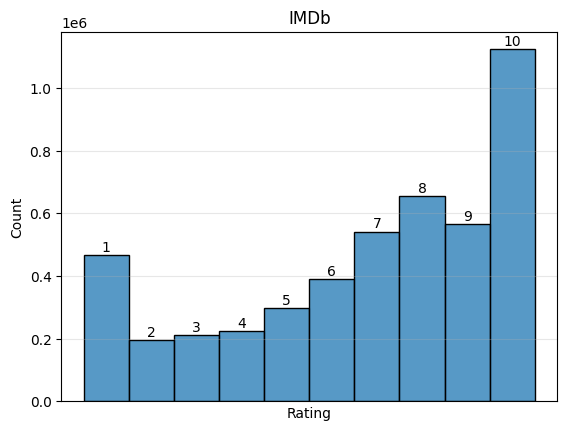

In [42]:
ax = sns.histplot(data=df_imdb, x='rating', bins=10)

for i, patch in enumerate(ax.patches, 1):
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width()/2., 
        height + ax.get_ylim()[1] * 0.01,
        f'{i}',                               
        ha='center'                           
    )

plt.title('IMDb')
plt.xticks([])
plt.xlabel('Rating')
plt.ylabel('Count')

plt.grid(True, alpha=0.3)

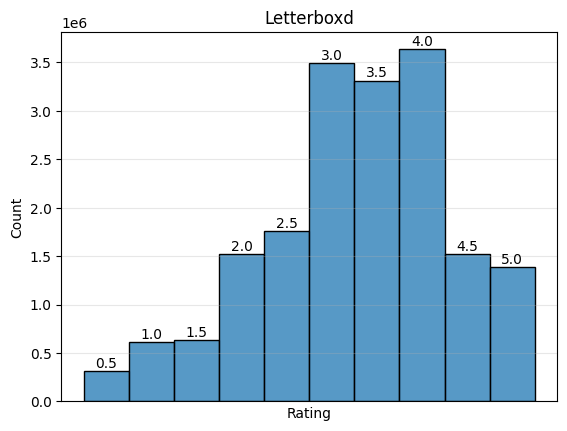

In [43]:
ax = sns.histplot(data=df_letterboxd, x='rating', bins=10)

for i, patch in enumerate(ax.patches, 1):
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width()/2., 
        height + + ax.get_ylim()[1] * 0.01,
        f'{i * 0.5}',                               
        ha='center'                           
    )

plt.title('Letterboxd')
plt.xticks([])
plt.xlabel('Rating')
plt.ylabel('Count')

plt.grid(True, alpha=0.3)

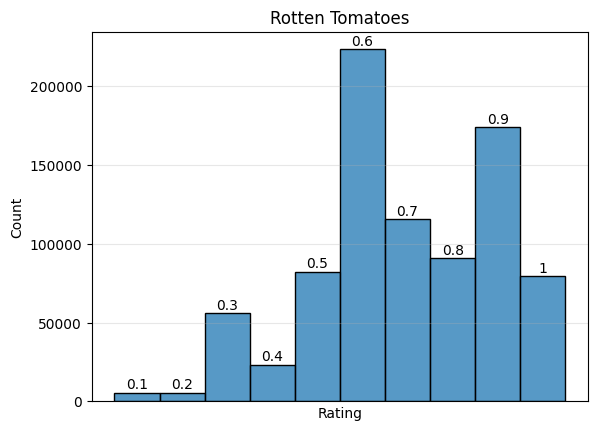

In [46]:
ax = sns.histplot(
    data=df_rt,
    x='originalScore_rating',
    bins=10,
    binrange=(0, 1))

for i, patch in enumerate(ax.patches, 1):
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width()/2., 
        height + ax.get_ylim()[1] * 0.01,
        f'{i * 0.1:.1g}',                               
        ha='center'                           
    )

plt.title('Rotten Tomatoes')
plt.xticks([])
plt.xlabel('Rating')
plt.ylabel('Count')

plt.grid(True, alpha=0.3)

# TODO: apagar no final (essa ferramenta hiberna e loga no estado do jpynb)

In [47]:
%pip install dill

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import dill
dill.dump_session('notebook_env.db')

In [3]:
import dill
dill.load_session('notebook_env.db')